# Mehmet SOLAK - 20217170022 - Concrete Compressive Strength - PR Algoritması

Bu projede, `Concrete Compressive Strength` veriseti kullanılarak, Polynomial Regression algoritması ile makine öğrenmesi modeli oluşturulması amaçlanmıştır.

- Veri seti, betonun basınç dayanımını (Concrete compressive strength) tahmin etmek üzere 8 girdi ve 1 çıktı değişkeninden oluşan 1030 örnekten oluşan veri setidir.

## Projenin Süreci:

- `Kütüphanelerin Eklenmesi`
- `Veri Setinin Yüklenmesi`
- `Keşifsel Veri Analizi`
- `Ön İşleme Süreci`
- `Eğitim ve Test Setlerine Ayrılması`
- `Ölçeklendirme İşlemi`
- `Modelin Eğitilmesi ve Tahmin Etme Süreci`

# Gerekli Kütüphanelerin Eklenmesi

Projede kullanılacak çeşitli kütüphaneleri ve fonksiyonları içe aktarıyorum. Her bir kütüphane ve fonksiyonun amacı aşağıda açıklanmıştır:

1. **`import pandas as pd`**:
   - Pandas, veri işleme ve analiz için kullanılan bir kütüphanedir. Veri çerçeveleri (DataFrame) ve seriler (Series) gibi yapılar sağlar ve CSV, Excel dosyalarını okuma/yazma işlemlerinde kullanılır.

2. **`import numpy as np`**:
   - NumPy, sayısal hesaplamalar ve matematiksel işlemler için kullanılan bir kütüphanedir. Çok boyutlu diziler (arrays) oluşturmayı ve bu diziler üzerinde işlemler yapmayı kolaylaştırır.

3. **`import matplotlib.pyplot as plt`**:
   - Matplotlib, veri görselleştirme için kullanılan bir kütüphanedir. **`pyplot`** modülü, grafikler oluşturmayı ve özelleştirmeyi sağlar (örneğin, çizgi grafikleri, histogramlar).

4. **`import seaborn as sns`**:
   - Seaborn, Matplotlib üzerine inşa edilmiş, istatistiksel veri görselleştirme için kullanılan bir kütüphanedir. Daha estetik ve kolayca özelleştirilebilir grafikler oluşturmayı sağlar.

5. **`from sklearn.model_selection import train_test_split, cross_val_score`**:
   - **`train_test_split`**: Veri kümesini eğitim ve test olarak bölmek için kullanılır.
   - **`cross_val_score`**: Çapraz doğrulama (cross-validation) yöntemiyle modelin performansını değerlendirmeye yarar.

6. **`from sklearn.preprocessing import StandardScaler`**:
   - Verileri ölçeklendirmek için kullanılır. Özellikle makine öğrenmesi algoritmalarında, özelliklerin standart bir ölçekte olması performansı artırır.

7. **`from sklearn.linear_model import LinearRegression`**:
   - Doğrusal regresyon modelleri oluşturmak için kullanılan sınıftır. Basit veya çoklu doğrusal regresyon modelleri oluşturabilir.

8. **`from sklearn.preprocessing import PolynomialFeatures`**:
   - Polinom regresyon oluşturmak için kullanılır. Bu sınıf, giriş verilerini daha yüksek dereceli polinomlara dönüştürür ve böylece doğrusal olmayan ilişkiler de modellenebilir.

9. **`from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score`**:
   - **`mean_absolute_error`**: Gerçek değerlerle tahmin edilen değerler arasındaki ortalama mutlak farkı hesaplar.
   - **`mean_squared_error`**: Gerçek değerlerle tahmin edilen değerler arasındaki hata karelerinin ortalamasını hesaplar.
   - **`r2_score`**: Modelin açıklama gücünü ölçen bir metrik. 1'e ne kadar yakınsa, model o kadar iyi çalışır.

10. **`import statsmodels.api as sm`**:
    - Statsmodels, istatistiksel modelleme ve testler için kullanılan bir kütüphanedir. Özellikle regresyon analizi ve hipotez testlerinde güçlü araçlar sunar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Veri Setinin Yüklenmesi

1. **`DATASET_FILE_PATH`**: Veri setinin dosya yolunu bir değişkene atıyorum. Bu yol, veri setinin bulunduğu dizini ve dosya adını içerir.
   - Burada, dosya adı `Concrete_Data.xls` ve yol `"./concrete+compressive+strength/"` olarak belirtilmiştir.

2. **`pd.read_excel()`**: `pandas` kütüphanesinin `read_excel` fonksiyonu, Excel formatındaki dosyaları okumak ve bir `DataFrame` nesnesine dönüştürmek için kullanılır.
   - Burada `DATASET_FILE_PATH` değişkeni, okunacak dosyanın yolunu belirtir.

3. **`df.head()`**: Veri setinin ilk 5 satırını döndürür.
   - Veri setinin başarılı bir şekilde yüklendiğini görüntüleme amacıyla kullanıyorum.
   - Veri setinin genel yapısını anlamak, sütun isimlerini ve örnek verileri görmek için kullandım.

In [2]:
DATASET_FILE_PATH : str = "./concrete+compressive+strength/Concrete_Data.xls"
df = pd.read_excel(DATASET_FILE_PATH)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# Keşifsel Veri Analizi

#### DataFrame'deki Sütun İsimlerini Yeniden Adlandırma

`df.rename()` metodu bir DataFrame'in isimlerinin yeniden adlandırılmasını sağlar.

1. **`df.rename(columns={...}, inplace=True)`**
   - **Açıklama:** `df.rename()` fonksiyonu, DataFrame'deki sütun isimlerini değiştirmek için kullanılır. 
   - `columns={...}` parametresi, hangi sütunların hangi yeni isimlerle değiştirileceğini belirten bir sözlük (dictionary) içerir. 
   - `inplace=True` parametresi, yapılan değişikliğin doğrudan `df` üzerinde yapılmasını sağlar, yani yeni bir DataFrame döndürülmez, mevcut DataFrame güncellenir.

2. **Sütun İsimlerini Değiştirme (Örnekler)**

   - **`'Cement (component 1)(kg in a m^3 mixture)': 'cement_kg'`**
     - **Açıklama:** Bu satırda, `Cement (component 1)(kg in a m^3 mixture)` sütun adı, `cement_kg` olarak değiştirilmektedir. Bu, daha kısa ve daha anlamlı bir isim kullanmak amacıyla yapılmıştır.
   
   - **`'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast_furnace_slag_kg'`**
     - **Açıklama:** `Blast Furnace Slag (component 2)(kg in a m^3 mixture)` sütun adı, `blast_furnace_slag_kg` olarak değiştirilmiştir. Bu isim, "blast furnace slag"ın kilogram cinsinden olduğunu belirten daha açıklayıcı bir ad olmuştur.

   - **`'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash_kg'`**
     - **Açıklama:** `Fly Ash (component 3)(kg in a m^3 mixture)` sütunu, `fly_ash_kg` olarak adlandırılmıştır. Buradaki değişiklik, "fly ash" bileşeninin kilogram cinsinden olduğunu belirtmek amacıyla yapılmıştır.

   - **`'Water  (component 4)(kg in a m^3 mixture)': 'water_kg'`**
     - **Açıklama:** `Water  (component 4)(kg in a m^3 mixture)` sütun ismi, daha kısa ve net bir isim olan `water_kg` ile değiştirilmiştir.

   - **`'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer_kg'`**
     - **Açıklama:** `Superplasticizer (component 5)(kg in a m^3 mixture)` sütun ismi, daha açıklayıcı bir hale getirilmiştir ve artık `superplasticizer_kg` olarak anılacaktır.

   - **`'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate_kg'`**
     - **Açıklama:** Bu sütun, `Coarse Aggregate  (component 6)(kg in a m^3 mixture)` isminden, `coarse_aggregate_kg` ismine dönüştürülmüştür. Bu daha kısa ve açıklayıcı bir isimdir.

   - **`'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_aggregate_kg'`**
     - **Açıklama:** `Fine Aggregate (component 7)(kg in a m^3 mixture)` sütun adı, `fine_aggregate_kg` olarak değiştirilmiştir. Bu, daha anlaşılır bir isimlendirme sağlar.

   - **`'Age (day)': 'age_days'`**
     - **Açıklama:** `Age (day)` sütun ismi, `age_days` olarak değiştirilmiştir. Bu isim, yaş (day) bilgisinin "gün" cinsinden olduğunu belirtmek için seçilmiştir.

   - **`'Concrete compressive strength(MPa, megapascals)': 'compressive_strength_mpa'`**
     - **Açıklama:** Son sütun ismi olan `Concrete compressive strength(MPa, megapascals)`, `compressive_strength_mpa` olarak değiştirilmiştir. Bu, betonun sıkıştırma dayanımının megapascal (MPa) cinsinden olduğunu açıkça belirtir.

In [3]:
df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'cement_kg',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast_furnace_slag_kg',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash_kg',
    'Water  (component 4)(kg in a m^3 mixture)': 'water_kg',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer_kg',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate_kg',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_aggregate_kg',
    'Age (day)': 'age_days',
    'Concrete compressive strength(MPa, megapascals) ': 'compressive_strength_mpa'
}, inplace=True)

### Veri Seti Genel Bilgisi

`df.info()` komutu, veri seti hakkında genel bilgi sağlar. Bu bilgi, veri setinin yapısını anlamak için kullanılır.

**Sağlanan Bilgiler:**
- **Veri tipi**: Veri setinin bir `DataFrame` olduğu belirtilir.
- **Sütun sayısı**: Veri setindeki toplam sütun (kolon) sayısını gösterir.
- **Satır sayısı**: Veri setindeki toplam satır sayısını belirtir.
- **Sütun isimleri ve veri türleri**: Her sütunun adı, veri türü (ör. `int64`, `float64`, `object`) ve eksik değer sayısı gösterilir.
- **Bellek kullanımı**: Veri setinin bellek kullanım miktarını verir.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cement_kg                 1030 non-null   float64
 1   blast_furnace_slag_kg     1030 non-null   float64
 2   fly_ash_kg                1030 non-null   float64
 3   water_kg                  1030 non-null   float64
 4   superplasticizer_kg       1030 non-null   float64
 5   coarse_aggregate_kg       1030 non-null   float64
 6   fine_aggregate_kg         1030 non-null   float64
 7   age_days                  1030 non-null   int64  
 8   compressive_strength_mpa  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### Veri Setinin İstatistiksel Özeti

`df.describe()` komutu, veri setindeki sayısal sütunların temel istatistiksel özetini verir. Bu özet, veri setindeki sayısal değişkenlerin dağılımını anlamak için kullanılır.

**Sağlanan Bilgiler:**
- **`count`**: Her sütundaki boş olmayan (NaN olmayan) veri sayısını gösterir.
- **`mean`**: Her sütunun aritmetik ortalamasını hesaplar.
- **`std`**: Her sütunun standart sapmasını verir.
- **`min`**: Her sütundaki minimum değeri gösterir.
- **`25%` (birinci çeyrek)**: Verinin %25'lik kısmının altındaki değerleri temsil eder.
- **`50%` (medyan veya ikinci çeyrek)**: Ortanca değeri verir.
- **`75%` (üçüncü çeyrek)**: Verinin %75'lik kısmının altındaki değerleri temsil eder.
- **`max`**: Her sütundaki maksimum değeri gösterir.

**Kullanım Amacı**:
 - Verinin genel yapısını anlamak.
 - Veri setindeki özet istatistiklere hızlıca erişmek.
 - Anormal değerleri (outlier) veya verinin genel dağılımını tespit etmek.
- **`df`**: Daha önce tanımlanmış bir `pandas` DataFrame nesnesidir. İçerisindeki veriler bu metotla analiz edilir.

In [5]:
df.describe()

,cement_kg,blast_furnace_slag_kg,fly_ash_kg,water_kg,superplasticizer_kg,coarse_aggregate_kg,fine_aggregate_kg,age_days,compressive_strength_mpa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Eksik Verilerin Analizi

Veri setindeki her sütundaki eksik (null) değerlerin toplam sayısını hesaplar:

- **`df.isnull()`**: Veri setindeki her bir hücre için `True` (eksik) veya `False` (eksik değil) değeri döndürür.
- **`.sum()`**: Her sütundaki `True` değerlerini toplar ve eksik değerlerin sayısını verir.

Bu analiz, eksik veri bulunan sütunları belirlemek ve eksik veri yönetimi stratejileri (örneğin, doldurma, çıkarma) geliştirmek için kullanılır.

In [6]:
df.isnull().sum()

cement_kg                   0
blast_furnace_slag_kg       0
fly_ash_kg                  0
water_kg                    0
superplasticizer_kg         0
coarse_aggregate_kg         0
fine_aggregate_kg           0
age_days                    0
compressive_strength_mpa    0
dtype: int64

### Özellikler İçin Histogram Görselleştirmeleri

Veri kümesindeki her bir özelliğin (sütunun) histogramını oluşturur. Bu histogramlar `4x3` ızgara düzeninde yerleştirilir ve her bir özelliğin dağılımını görsel olarak incelemenizi sağlar. `Görselleştirmeler, her özelliğin değerlerinin sıklığını (counts) gösterir`.

1. **`plt.figure(figsize=(16,16))`**
   - **Amaç**: Grafiklerin boyutlarını belirler. `figsize` parametresi ile, grafiğin genişlik ve yüksekliği inç cinsinden ayarlanır.
   - **Detay**: Burada `(16, 16)` değeri, grafiğin genişliğini ve yüksekliğini 16 inç olarak ayarlar. Bu, birden fazla subplot içerdiği için her birinin rahatça görüntülenebilmesi adına geniş bir alan sağlar.

2. **`for index, col in enumerate(df.columns):`**
   - **Amaç**: Veri çerçevesindeki her bir sütunu (özelliği) tek tek gezmek için bir döngü başlatılır. `df.columns` veri çerçevesindeki tüm sütun isimlerini döndüren bir listedir.
   - **Detay**: `enumerate()` fonksiyonu, her bir sütun adı ile birlikte o sütunun indeksini döndüren bir işlevdir. Bu, her bir sütunun yerini belirlemeye yardımcı olur.

3. **`plt.subplot(4, 3, index + 1)`**
   - **Amaç**: Çizim alanı üzerinde bir alt grafik (subplot) oluşturur. Bu fonksiyon, bir ızgara düzeninde grafikleri yerleştirir.
   - **Detay**: Burada `4, 3` ifadesi, 4 satır ve 3 sütundan oluşan bir ızgara düzeni oluşturur. `index + 1` ise her bir alt grafiğin sırasını belirler (0'dan başlayıp 1 artırılır, bu yüzden birinci grafik için 1, ikinci için 2, vb.).

4. **`plt.hist(df[col])`**
   - **Amaç**: Histogram çizer. Bir sütunun değerlerinin sıklık dağılımını görselleştirmek için kullanılır.
   - **Detay**: `df[col]` ifadesiyle, `df` veri çerçevesindeki her bir sütun (özellik) sırayla alınır ve bu sütunun histogramı çizilir. Histogram, verinin hangi aralıkta yoğunlaştığını ve frekanslarını gösterir.

5. **`plt.xticks()`**
   - **Amaç**: X eksenindeki etiketleri ayarlamak için kullanılır.
   - **Detay**: Bu fonksiyon, X eksenindeki etiketlerin otomatik olarak yerleştirilmesini sağlar. Eğer özelleştirilmiş etiketler gerekiyorsa, bunlar da burada belirlenebilir.

6. **`plt.xlabel(col)`**
   - **Amaç**: X eksenine etiket ekler.
   - **Detay**: Her bir histogramda X ekseninin adı, o sütunun adıyla (özelliğiyle) eşleşecek şekilde ayarlanır. `col` burada sütunun adını temsil eder.

7. **`plt.ylabel('counts')`**
   - **Amaç**: Y eksenine etiket ekler.
   - **Detay**: Y eksenine "counts" etiketi eklenir, çünkü histogramda her bir bar (çubuk), verinin bir aralıktaki frekansını (kaçar tane değer olduğunu) gösterir.

8. **`plt.show()`**
   - **Amaç**: Grafiklerin ekranda görünmesini sağlar.
   - **Detay**: Bu komut, daha önce oluşturduğumuz tüm grafiklerin ekranda görünmesini sağlar. Grafikleri oluşturduktan sonra bu komut olmadan grafik görüntülenmez.

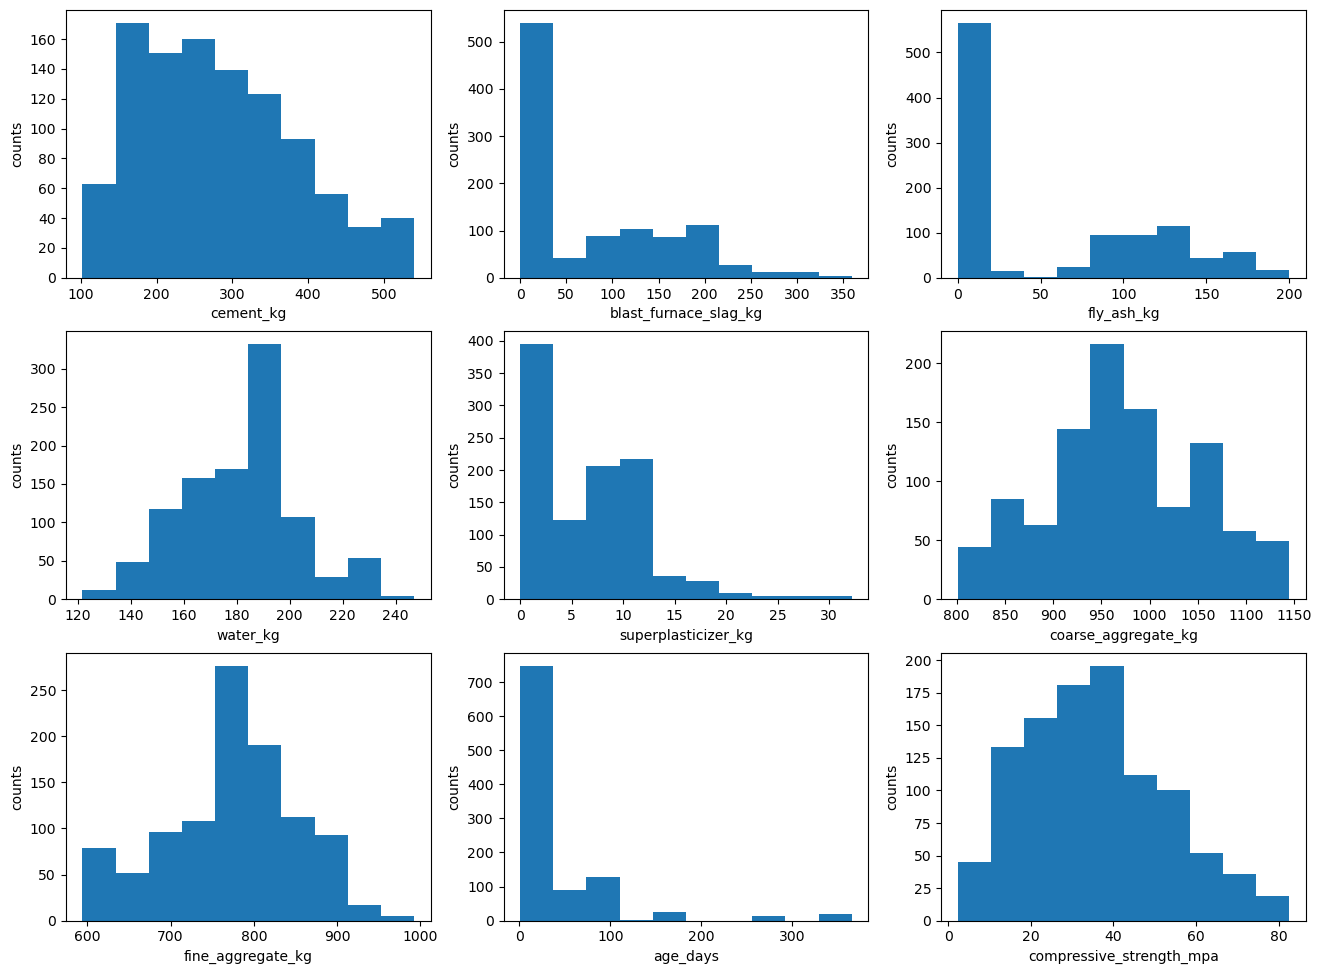

In [7]:
# Burada çizim yaptığımız alanın boyutunu belirliyorum.
plt.figure(figsize=(16,16))

# Veri kümesindeki her özelliği (sütunu) iterasyonla gezip histogramlarını çiziyorum.
for index, col in enumerate(df.columns):
    # 4x3 ızgara düzeninde subplot oluşturuyorum.
    plt.subplot(4, 3, index + 1)
    # Özelliğin histogramını çiziyorum. Burada `hist` komutu genelde bir elemanın veri setindeki frekansını bulmamıza, veri setinin dağılımını keşfetmemize yardımcı olur.
    plt.hist(df[col])
    # X eksenindeki etiketleri ayarlıyorum.
    plt.xticks()
    # X Ekseninin adını belirliyorum, burada şuanki iterasyondaki özelliğin adını veriyorum.
    plt.xlabel(col)
    # Y Ekseninin adını belirliyorum. Hangi değerin kaç kere tekrar ettiğini öğrendiğim için `counts` adını verdim.
    plt.ylabel('counts')

# Grafiklerin görüntülenmesini sağlıyorum.
plt.show()

### Özellikler ve Hedef Değişken Arasındaki Scatter Plot Görselleştirmeleri

Veri kümesindeki her bir özelliği (hedef değişken hariç), hedef değişkenle karşılaştıran scatter plot'lar (dağılım grafikleri) oluşturur. Bu grafikleri 4x3 ızgara düzeninde yerleştirir ve her grafiğin boyutu 16x16 inç olarak ayarlanmıştır. Her bir grafikte, özellik ve hedef değişkenin isimleri ile etiketlenmiş ve noktalar kırmızı renkte ve %50 şeffaflıkla gösterilmiştir.

1. **`plt.figure(figsize=(16, 16))`**
   - **Amaç**: Grafiklerin boyutlarını belirler. `figsize` parametresi ile, grafiğin genişlik ve yüksekliği inç cinsinden ayarlanır.
   - **Detay**: Burada `(16, 16)` değeri, grafiğin genişliğini ve yüksekliğini 16 inç olarak ayarlar. Çok sayıda subplot içereceği için her birinin rahatça görüntülenebilmesi adına geniş bir alan sağlar.

2. **`for index, col in enumerate(df.columns[:-1]):`**
   - **Amaç**: Veri çerçevesindeki her sütunu tek tek gezmek için bir döngü başlatılır. `df.columns[:-1]` ifadesi, son sütun hariç (hedef değişkeni hariç) tüm sütunları döndürür.
   - **Detay**: `enumerate()` fonksiyonu, her bir sütun adı ile birlikte o sütunun indeksini döndüren bir işlevdir. Döngüde son sütunu dahil etmemek için `[:-1]` kullanılmıştır.

3. **`plt.subplot(4, 3, index + 1)`**
   - **Amaç**: Çizim alanı üzerinde bir alt grafik (subplot) oluşturur. Bu fonksiyon, bir ızgara düzeninde grafikleri yerleştirir.
   - **Detay**: Burada `4, 3` ifadesi, 4 satır ve 3 sütundan oluşan bir ızgara düzeni oluşturur. `index + 1` ise her bir alt grafiğin sırasını belirler (0'dan başlayıp 1 artırılır, bu yüzden birinci grafik için 1, ikinci için 2, vb.).

4. **`plt.scatter(df[df.columns[-1]], df[col], color='red', alpha=0.5)`**
   - **Amaç**: Scatter plot (dağılım grafiği) çizer. Burada, hedef değişken ile iterasyondaki özellik arasındaki ilişkiyi görselleştirir.
   - **Detay**: `df[df.columns[-1]]` ifadesi, son sütunu (hedef değişken) alır ve X eksenine yerleştirir. `df[col]` ise her iterasyonda diğer özellikleri Y eksenine yerleştirir. `color='red'` ve `alpha=0.5` parametreleri, scatter plot'taki noktaların rengini kırmızı yapar ve şeffaflık oranını %50 yapar.

5. **`plt.xlabel(df.columns[-1])`**
   - **Amaç**: X eksenine etiket ekler. X eksenindeki veriler, hedef değişkeni temsil eder.
   - **Detay**: `df.columns[-1]` ifadesi, son sütunun adını alır ve X ekseninin etiketine yerleştirir.

6. **`plt.ylabel(col)`**
   - **Amaç**: Y eksenine etiket ekler. Y eksenindeki veriler, iterasyondaki özelliği temsil eder.
   - **Detay**: `col` burada iterasyonla ilerleyen sütunun adını temsil eder. Her bir iterasyonda farklı bir sütun adı Y ekseninde gösterilir.

7. **`plt.tight_layout()`**
   - **Amaç**: Grafiklerin yerleşimini düzenler ve her bir subplot'un üst üste binmeden düzgün şekilde görünmesini sağlar.
   - **Detay**: Subplotlar arasında uygun boşlukları otomatik olarak ayarlayarak, tüm grafiklerin ekranda düzgün bir şekilde yerleşmesini sağlar.

8. **`plt.show()`**
   - **Amaç**: Grafiklerin ekranda görünmesini sağlar.
   - **Detay**: Bu komut, daha önce oluşturduğumuz tüm grafiklerin ekranda görünmesini sağlar. Grafikleri oluşturduktan sonra bu komut olmadan grafik görüntülenmez.

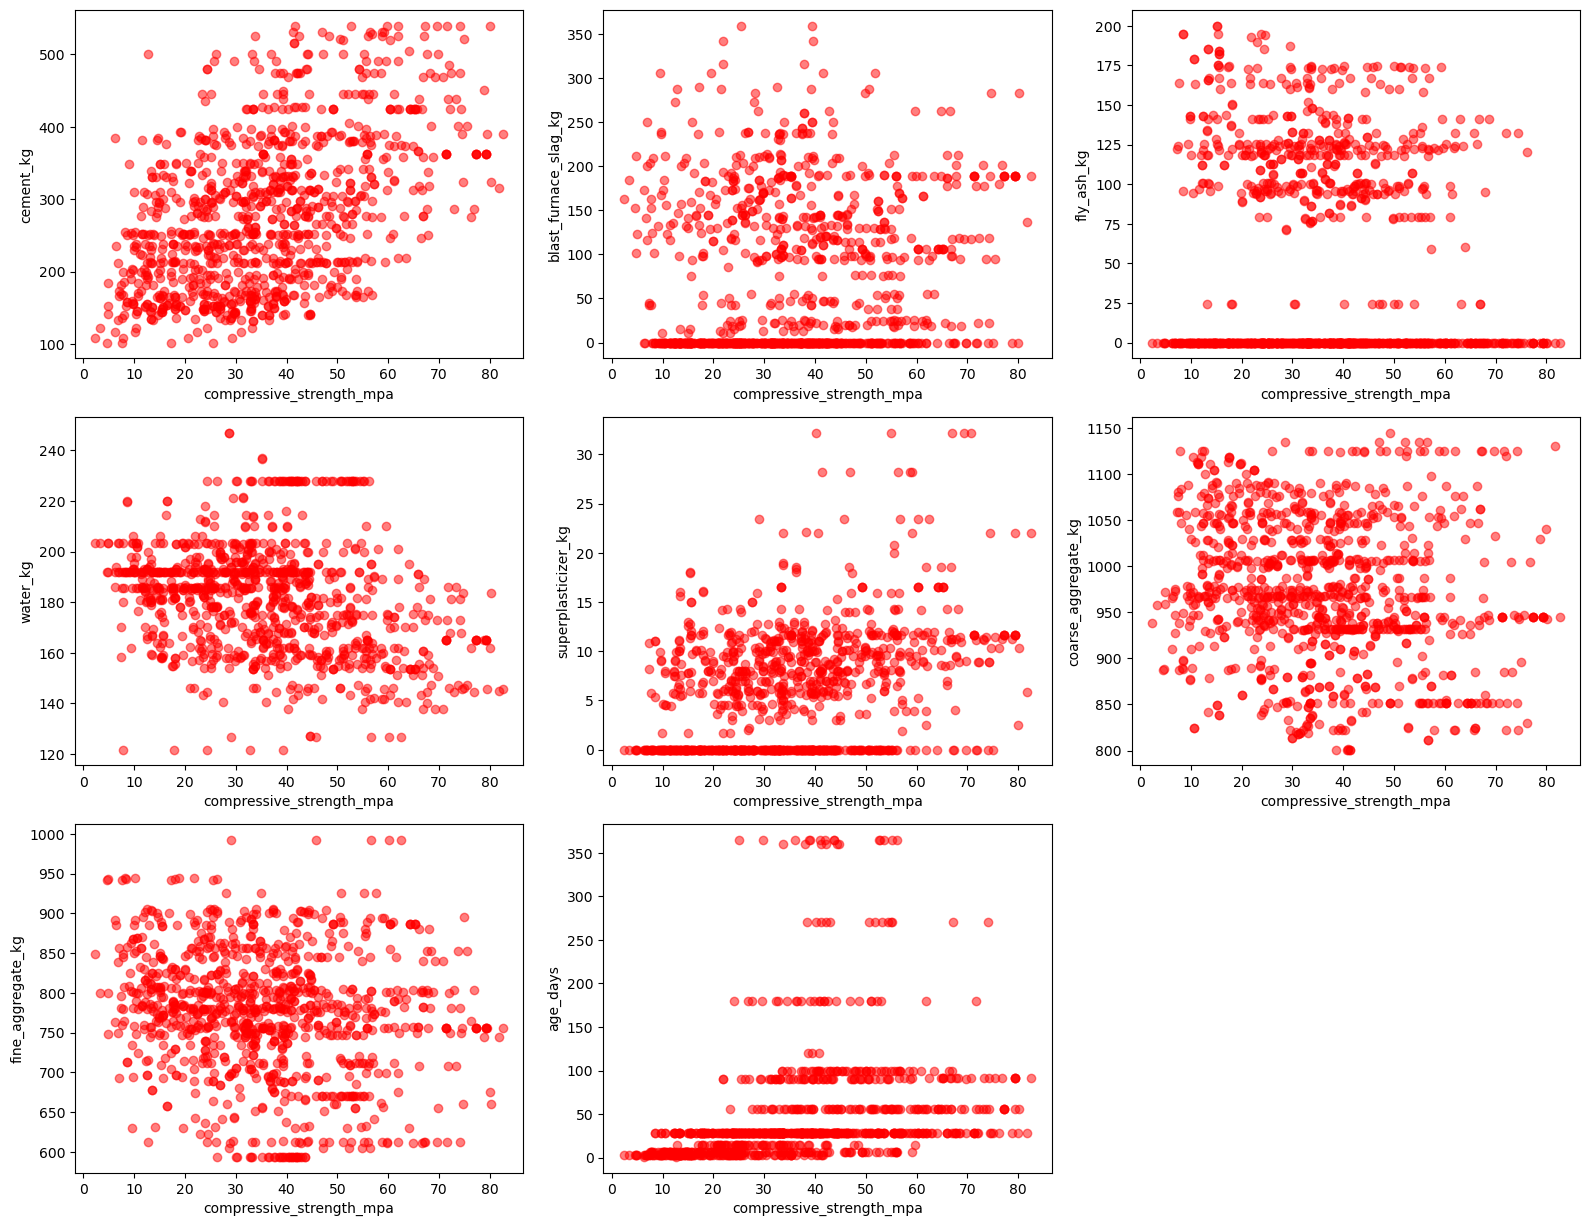

In [8]:
# Burada çizim yaptığımız alanın boyutunu belirliyorum.
plt.figure(figsize=(16, 16))

# Hedef değişken haricindeki her özelliği burada hedef değişken ile karşılaştırarak Scatter Plot kümesi oluşturuyorum.
for index, col in enumerate(df.columns[:-1]):
    # 4x3 ızgara düzeninde subplot oluşturuyorum.
    plt.subplot(4, 3, index + 1)
    # İterasyondaki özellik ile hedef değişken arasındaki ilişkiyi gösteren Scatter Plot'u çiziyorum.
    plt.scatter(df[df.columns[-1]], df[col], color='red', alpha=0.5)
    # X Eksenindeki verilerin hangi özelliğe ait olduğunu isim vererek belirliyorum. Hedef değişkenim X eksenindeki verileri kapsıyor.
    plt.xlabel(df.columns[-1])
    # Y Eksenindeki verilerin hangi özelliğe ait olduğunu belirliyorum. İterasyondaki özelliğin adını veriyorum.
    plt.ylabel(col)

# Düzenlemeyi yaparak her şeyin üst üste binmeden düzgün görünmesini sağlıyorum.
plt.tight_layout()
# Grafiklerin tümünü görüntülüyorum.
plt.show()

### Normal Dağılımı Gözlemlemek İçin Histogram Grafiği

Bu grafikte normal dağılımın gözlemlenip gözlemlenemeyeceğini anlamak için aşağıdaki noktaları dikkate alabiliriz:

1. **Histogram ve Yoğunluk Eğrileri**  
   Grafikteki histogram çubukları, yoğunluk eğrileriyle karşılaştırıldığında dağılımın şekli hakkında bilgi verir. Eğer yoğunluk eğrileri simetrik ve çan şeklinde (gauss eğrisi gibi) bir görünüm sergiliyorsa, bu normal dağılıma yakın olabilir.

2. **Veri Yoğunluğu ve Simetri**  
   Normal dağılımda veriler, ortalamaya yakın yoğunlaşır ve uçlara doğru eşit şekilde azalır. Grafiği incelediğimizde yoğunluk eğrilerinin genellikle simetrik olmadığını ve bazı bileşenlerin sola veya sağa çarpık olduğunu gözlemliyoruz.

3. **Kuyruklar ve Çarpıklık**  
   Bazı bileşenler için uzun kuyruklar ve çarpıklık (asimetri) gözlemleniyor gibi görünüyor, bu da normal dağılımdan sapmalara işaret eder.

**Kod Açıklamaları**

1. **`plt.figure(figsize=(10, 6))`**
   - **Amaç**: Grafiklerin boyutlarını belirler. `figsize` parametresi ile, grafiğin genişlik ve yüksekliği inç cinsinden ayarlanır.
   - **Detay**: Burada `(10, 6)` değeri, grafiğin genişliğini 10 inç ve yüksekliğini 6 inç olarak ayarlar. Bu, verinin görselleştirilmesi için uygun bir boyutlandırmadır.

2. **`sns.histplot(df, kde=True)`**
   - **Amaç**: `seaborn` kütüphanesinin `histplot` fonksiyonu ile histogram ve kernel yoğunluk tahmini (KDE) çizer.
   - **Detay**: 
     - `df`: Veri çerçevesindeki sayısal veriler kullanılır.
     - `kde=True`: Bu parametre, histogramın üzerine verinin yoğunluk fonksiyonunun (density curve) çizilmesini sağlar. KDE, verinin dağılımını daha pürüzsüz bir şekilde görmek için kullanılır. Histogramla birlikte verinin yoğunluk dağılımını daha net görebilirsiniz.
   
3. **`plt.title('Histogram ve Density')`**
   - **Amaç**: Grafiğe başlık ekler.
   - **Detay**: `plt.title()` fonksiyonu, grafiğin üst kısmına başlık ekler. Burada başlık olarak "Histogram ve Density" kullanılmıştır, bu da grafikte gösterilen içeriği tanımlar.

4. **`plt.show()`**
   - **Amaç**: Grafiğin ekranda görünmesini sağlar.
   - **Detay**: Bu komut, daha önce oluşturduğumuz tüm grafiklerin ekranda görünmesini sağlar. Grafiklerin oluşturulmasından sonra bu komut olmadan grafiğin görüntülenmesi sağlanmaz.

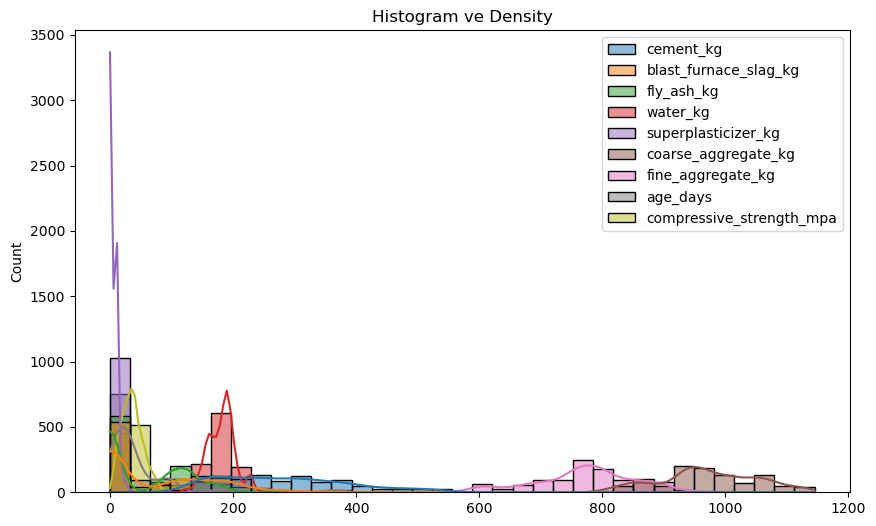

In [9]:
# Burada grafik 10x6 inç boyutunda olacak şekilde ayarladım.
plt.figure(figsize=(10,6))

# df isimli veri çerçevesindeki (DataFrame) sayısal veriler için bir histogram ve kernel yoğunluk tahminini (KDE) çizer. 
# kde=True parametresi, verinin yoğunluk fonksiyonunu (density curve) çizmeyi sağlar.
sns.histplot(df, kde=True)

# Grafiğe bir başlık ekliyorum.
plt.title('Histogram ve Density')

# Grafiği ekranda gösteriyorum.
plt.show()

### Veri Kümesinin Temel Özelliklerini Görselleştirme

Veri kümesindeki her bir sütun için bir boxplot (kutu grafiği) çizer ve tüm bu kutu grafikleri bir arada görselleştirir. Her bir sütunun boxplot’u, o sütunun veri dağılımını, ortalama değerini, çeyreklerini ve aykırı değerlerini gösterecektir. Bu görsel, verideki temel özelliklerin ve olası aykırı değerlerin anlaşılmasına yardımcı olur.

Boxplot’lar, verilerin merkezi eğilimlerini (ortalamalar, medyan) ve yayılımını (çeyrekler arası mesafe) görsel olarak sunar. Aykırı değerler de boxplot üzerinde belirgin şekilde görünür.

**Kod Açıklamaları**

1. **`plt.figure(figsize=(16, 16))`**
   - **Amaç**: Grafiklerin boyutlarını belirler. `figsize` parametresi ile, grafiğin genişlik ve yüksekliği inç cinsinden ayarlanır.
   - **Detay**: Burada `(16, 16)` değeri, grafiğin genişliğini 16 inç ve yüksekliğini 16 inç olarak ayarlar. Çok sayıda subplot içerdiği için her birinin rahatça görüntülenebilmesi adına geniş bir alan sağlanır.

2. **`for index, col in enumerate(df.columns):`**
   - **Amaç**: Veri çerçevesindeki her bir sütunu (özelliği) döngü ile tek tek gezmek.
   - **Detay**: `df.columns` ifadesi, veri çerçevesindeki tüm sütun adlarını içerir. `enumerate()` fonksiyonu, her sütunun sırasını (`index`) ve adını (`col`) döndüren bir işlevdir. Bu sayede her sütunun adını ve sırasını kullanarak grafikler oluşturulacaktır.

3. **`plt.subplot(4, 3, index + 1)`**
   - **Amaç**: Çizim alanı üzerinde bir alt grafik (subplot) oluşturur. Bu fonksiyon, bir ızgara düzeninde grafikleri yerleştirir.
   - **Detay**: Burada `4, 3` ifadesi, 4 satır ve 3 sütundan oluşan bir ızgara düzeni oluşturur. `index + 1` ise her alt grafiğin sırasını belirler (0'dan başlayıp 1 artırılır, bu yüzden birinci grafik için 1, ikinci için 2, vb.).

4. **`plt.boxplot(df[col])`**
   - **Amaç**: Her sütun için bir boxplot (kutu grafiği) çizer. Boxplot, verinin merkezi eğilimini, yayılmasını ve uç değerlerini (outlier) görselleştirir.
   - **Detay**: `df[col]` ifadesi, her sütundaki verileri alır ve bu verilerin kutu grafiği çizilir. Boxplot, medyan, çeyrekler arası mesafe (IQR) ve uç değerler hakkında bilgi verir.

5. **`plt.title(col)`**
   - **Amaç**: Her bir kutu grafiğine başlık ekler. Başlık, her bir sütunun ismiyle eşleşir.
   - **Detay**: `col` burada iterasyondaki sütun adını temsil eder ve bu ad her kutu grafiğine başlık olarak yerleştirilir.

6. **`plt.tight_layout()`**
   - **Amaç**: Grafiklerin düzenini iyileştirir. Bu fonksiyon, grafikler arasında uygun boşluklar sağlayarak, alt grafiklerin üst üste binmesini engeller.
   - **Detay**: Subplotlar arasında uygun boşlukları otomatik olarak ayarlar ve tüm grafiklerin düzenli bir şekilde görüntülenmesini sağlar.

7. **`plt.show()`**
   - **Amaç**: Grafiklerin ekranda görünmesini sağlar.
   - **Detay**: Bu komut, daha önce oluşturduğumuz tüm grafiklerin ekranda görünmesini sağlar. Grafiklerin oluşturulmasından sonra bu komut olmadan grafiğin görüntülenmesi sağlanmaz.

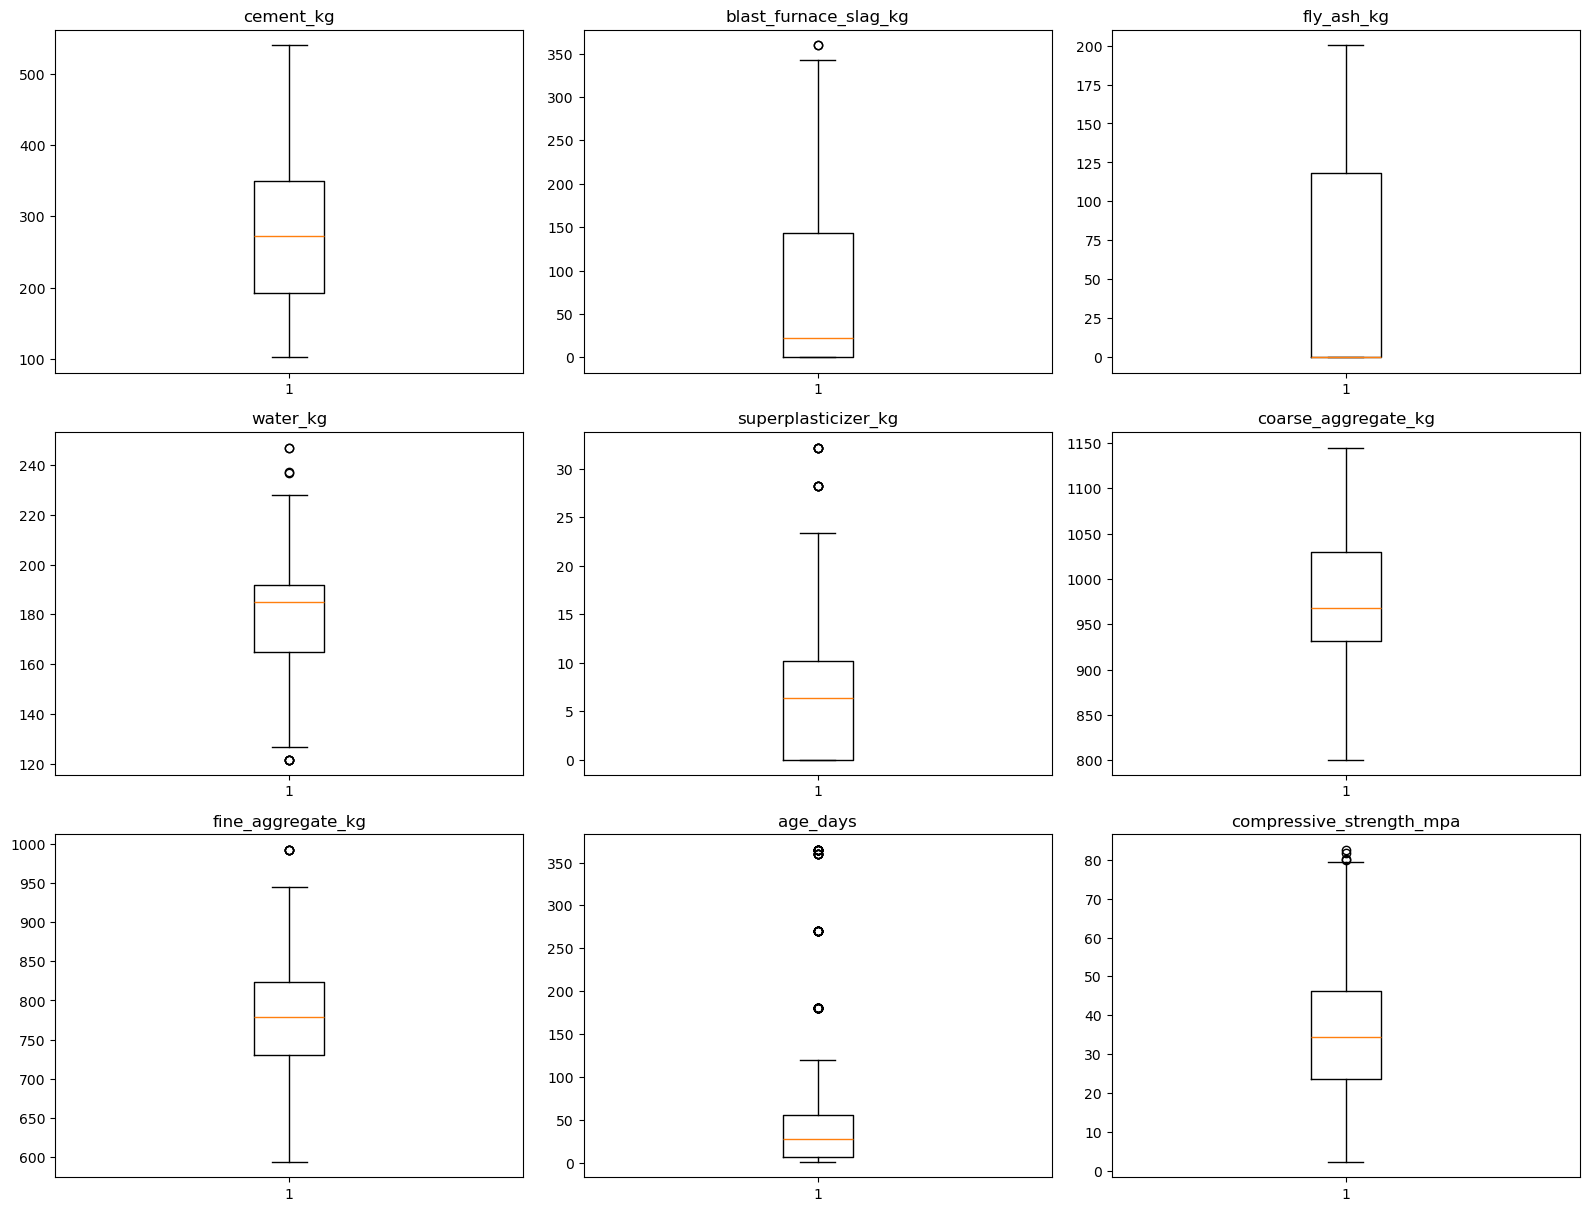

In [10]:
# Burada çizim yaptığımız alanın boyutunu belirliyorum. Aynı şekilde 16, 16 boyutunda bir çizim alanı belirliyorum.
plt.figure(figsize=(16, 16))

# df veri kümesinin her bir sütunu üzerinde döngü başlatıyorum. df.columns ifadesi, veri kümesinin tüm sütun isimlerini içerir.
# •	index: Sütunların sırasını tutar (0’dan başlayarak sayılır).
# •	col: Sütun isimlerini içerir (sütun adı olarak her iterasyonda bir sütun adı verilecektir).
for index, col in enumerate(df.columns):
    # 4x3 ızgara düzeninde subplot oluşturuyorum.
    plt.subplot(4, 3, index + 1)
    # Her bir sütun için boxplot (kutu grafiği) çizdiriyorum.
    plt.boxplot(df[col])
    # Her bir kutu grafiğine başlık ekliyorum.
    plt.title(col)

plt.tight_layout()
# Grafikleri gösteriyorum.
plt.show()

### Korelasyon Matrisi Görselleştirme

Veri setindeki sayısal sütunlar arasındaki ilişkileri görebilmek için bir korelasyon matrisi oluşturuyorum ve `seaborn` kütüphanesinin `heatmap` fonksiyonunu kullanarak bu ilişkiyi görselleştiriyorum. 

- **`df.corr()`**: Veri setindeki sayısal sütunlar arasındaki korelasyon katsayılarını hesaplar. Bu değerler -1 ile 1 arasında değişir:
  - **1**: Pozitif doğrusal ilişki (bir değişken artarken diğeri de artar).
  - **0**: Hiçbir ilişki yok.
  - **-1**: Negatif doğrusal ilişki (bir değişken artarken diğeri azalır).

- **`annot=True`**: Hücrelere korelasyon katsayılarını yazar.
- **`cmap='coolwarm'`**: Renk skalası olarak "coolwarm" seçilmiştir. Bu, yüksek pozitif korelasyonları sıcak (kırmızı), negatif korelasyonları ise soğuk (mavi) renklerle ifade eder.

**Çıktı**: Korelasyon değerlerinin görselleştirildiği bir ısı haritası elde edilir. Bu, hangi sütunların birbirleriyle güçlü veya zayıf ilişkiler içinde olduğunu hızlıca anlamaya yardımcı olur.

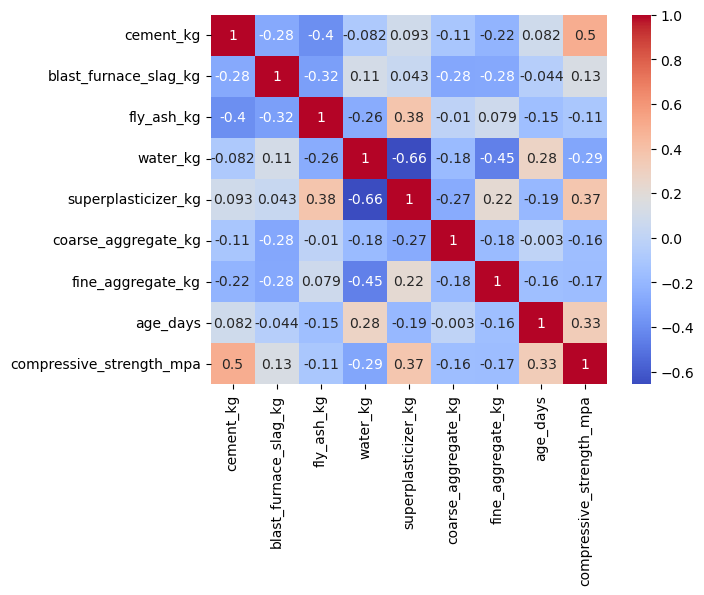

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Veri Ön İşleme

### Aykırı Değerlerin Temizlenmesi

Burada veri çerçevesindeki sayısal sütunlardaki uç değerleri (outliers) tespit edip temizlemeyi amaçladım. Uç değerler, verinin genel dağılımından önemli ölçüde sapmış ve modelleme sürecinde yanıltıcı olabilecek verilerdir. Fonksiyon, her sayısal sütun için IQR (Interquartile Range) yöntemini kullanarak, 1. çeyrek (Q1) ve 3. çeyrek (Q3) arasındaki farkı hesaplar. Ardından, alt ve üst sınırları belirler ve bu sınırların dışındaki verileri veri çerçevesinden çıkarır. Sonuç olarak, uç değerlerden arındırılmış bir veri seti elde edilir, bu da modelin daha doğru ve güvenilir sonuçlar üretmesini sağlar.

1. **`def remove_outliers_iqr(df):`**
   - **Amaç**: Fonksiyonu tanımlar. Bu fonksiyon, bir veri çerçevesi (`df`) alır ve IQR (Interquartile Range, çeyrekler arası mesafe) yöntemi kullanarak uç değerleri (outlier) çıkarır.
   - **Detay**: Fonksiyon, her sayısal sütun için çeyrekler arası mesafe yöntemini uygular ve alt/üst sınırlar dışında kalan verileri veri çerçevesinden çıkarır.

2. **`for column in df.select_dtypes(include=['float64', 'int64']).columns:`**
   - **Amaç**: Veri çerçevesindeki tüm sayısal sütunlar üzerinde işlem yapmak için bir döngü başlatır.
   - **Detay**: `df.select_dtypes(include=['float64', 'int64'])` ifadesi, sadece sayısal veri tiplerine sahip sütunları seçer (hem kayan noktalı sayılar (`float64`) hem de tam sayılar (`int64`) dahil). `df.columns` ile bu sayısal sütunlar üzerinden döngü yapılır.

3. **`Q1 = df[column].quantile(0.25)`**
   - **Amaç**: İlgili sütunun 1. çeyreğini (Q1) hesaplar.
   - **Detay**: `quantile(0.25)` fonksiyonu, verinin sıralı bir şekilde %25'lik dilimindeki değeri yani 1. çeyreği hesaplar.

4. **`Q3 = df[column].quantile(0.75)`**
   - **Amaç**: İlgili sütunun 3. çeyreğini (Q3) hesaplar.
   - **Detay**: `quantile(0.75)` fonksiyonu, verinin sıralı bir şekilde %75'lik dilimindeki değeri yani 3. çeyreği hesaplar.

5. **`IQR = Q3 - Q1`**
   - **Amaç**: Çeyrekler arası mesafeyi (IQR) hesaplar.
   - **Detay**: IQR, 3. çeyrek ile 1. çeyrek arasındaki farktır. Bu değer, verinin yayılımını ve dağılımını anlamamıza yardımcı olur.

6. **`lower_bound = Q1 - 1.5 * IQR`**
   - **Amaç**: Alt sınırı (lower bound) hesaplar.
   - **Detay**: Alt sınır, 1. çeyreğin altına 1.5 kat IQR eklenerek hesaplanır. Bu değer, uç değeri (outlier) tespit etmek için kullanılan alt sınırdır.

7. **`upper_bound = Q3 + 1.5 * IQR`**
   - **Amaç**: Üst sınırı (upper bound) hesaplar.
   - **Detay**: Üst sınır, 3. çeyreğin üstüne 1.5 kat IQR eklenerek hesaplanır. Bu değer, uç değeri (outlier) tespit etmek için kullanılan üst sınırdır.

8. **`df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]`**
   - **Amaç**: Alt ve üst sınır dışındaki verileri filtreler.
   - **Detay**: Burada `df[column] >= lower_bound` ve `df[column] <= upper_bound` koşulları ile, her sütundaki değerlerin alt ve üst sınırlar arasında olup olmadığı kontrol edilir. Eğer değer bu sınırlar dışındaysa, o değer veri çerçevesinden çıkarılır.

9. **`return df`**
   - **Amaç**: Temizlenmiş veri çerçevesini geri döndürür.
   - **Detay**: Döngü tamamlandıktan sonra, tüm uç değerler çıkarılmış ve sınırlarla uyumsuz veriler temizlenmiş veri çerçevesi geri döndürülür.

10. **`df_cleaned = remove_outliers_iqr(df)`**
   - **Amaç**: `df` veri çerçevesi üzerinde `remove_outliers_iqr` fonksiyonunu çalıştırarak uç değerleri temizler ve sonucu `df_cleaned` adlı yeni bir değişkende saklar.
   - **Detay**: Bu satırda `df` veri çerçevesine fonksiyon uygulanır ve temizlenmiş veri `df_cleaned` değişkeninde tutulur. Artık `df_cleaned`, uç değerlerden arındırılmış veri çerçevesidir.

In [12]:
def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)  # 1. Çeyrek
        Q3 = df[column].quantile(0.75)  # 3. Çeyrek
        IQR = Q3 - Q1  # IQR hesaplama

        lower_bound = Q1 - (1.5 * IQR)  # Alt sınır
        upper_bound = Q3 + (1.5 * IQR)  # Üst sınır

        # Alt ve üst sınır dışında kalan verileri filtreleme
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df)

# Eğitim ve Test Setlerine Ayrılması

Burada hedef değişken ve bağımsız değişkenler ayrıştırılır, ardından bağımsız değişkenler polinomal özelliklere dönüştürülür.

1. **`y = df_cleaned[df_cleaned.columns[-1]]`**:
   - **Amaç**: Hedef değişkeni (bağımlı değişken) belirler.
   - **Detay**: `df_cleaned.columns[-1]` ifadesi, veri kümesinin son sütununu seçer. `df_cleaned[df_cleaned.columns[-1]]`, bu sütunu hedef değişken olarak atar. `y` artık yalnızca hedef değişkeni içerir.

2. **`X = df_cleaned.drop(df_cleaned.columns[-1], axis=1)`**:
   - **Amaç**: Bağımsız değişkenleri (özellikler) belirler.
   - **Detay**: `drop()` fonksiyonu, son sütunu (hedef değişkeni) veri kümesinden çıkarır. **`axis=1`** parametresi, sütun bazlı işlem yapıldığını belirtir. `X`, hedef değişken hariç diğer tüm sütunları içerir.

3. **`poly = PolynomialFeatures(degree=3, include_bias=False)`**:
   - **Amaç**: Polinomal özellikler oluşturmak için bir nesne oluşturur.
   - **Detay**:
     - **`degree=3`**: Polinomal dönüşümde en yüksek dereceyi belirtir (burada 3. dereceye kadar olan polinomlar oluşturulacak).
     - **`include_bias=False`**: Dönüşümde sabit bir terim eklenmez. Bu, modelde zaten bir sabit terim eklenecekse gereksiz olur.

4. **`X_poly = poly.fit_transform(X)`**:
   - **Amaç**: Bağımsız değişkenleri (X) polinomal dönüşüme tabi tutar.
   - **Detay**:
     - **`fit_transform()`**: İlk olarak veriye uygun polinomal özellikleri öğrenir ve bu özellikleri dönüştürerek yeni bir veri kümesi oluşturur.
     - **`X_poly`**: Dönüşüm sonrası oluşturulan yeni özellikleri içerir. Örneğin, orijinal özellikler `[x1, x2]` ise, dönüşüm sonrası `[x1, x1^2, x1^3, x2, x2^2, x2^3, x1*x2]` gibi polinomlar elde edilir.

In [13]:
y = df_cleaned[df_cleaned.columns[-1]]
X = df_cleaned.drop(df_cleaned.columns[-1], axis=1)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

Veri kümesini eğitim (training) ve test (testing) setlerine ayırıyorum. Bu işlem, modeli eğitmek ve değerlendirmek için gereklidir.

1. **`train_test_split(X_poly, y, test_size=0.2, random_state=42)`**:
   - **Amaç**: Veriyi rastgele bir şekilde eğitim ve test setlerine böler.
   - **Parametreler**:
     - **`X_poly`**: Bağımsız değişkenler (özellikler). Polinomal dönüşüm sonrası elde edilen veri.
     - **`y`**: Bağımlı değişken (hedef değişken).
     - **`test_size=0.2`**: Verinin %20'si test seti olarak ayrılır. Geri kalan %80'i eğitim seti olarak kullanılır.
     - **`random_state=42`**: Kodun çalıştırıldığı her seferde aynı rastgele bölmeyi garanti etmek için belirli bir sabit tohum değeri kullanılır. Bu, sonuçların tekrarlanabilir olmasını sağlar.

2. **Sonuçlar**:
   - **`X_train`**: Eğitim setindeki bağımsız değişkenler.
   - **`X_test`**: Test setindeki bağımsız değişkenler.
   - **`y_train`**: Eğitim setindeki hedef değişkenler.
   - **`y_test`**: Test setindeki hedef değişkenler.

### İşlem Mantığı:
- **Eğitim seti (X_train, y_train)**: Model bu veriyle eğitilir.
- **Test seti (X_test, y_test)**: Modelin performansı bu veriyle değerlendirilir. Modelin hiç görmediği veriler üzerinde nasıl bir performans sergilediği bu aşamada ölçülür.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# En İyi Modelin Eğitilmesi ve Tahminlerin Yapılması

Doğrusal regresyon modeli oluşturup ve eğitim verileriyle bu modeli eğitiyorum.

1. **`model = LinearRegression()`**:
   - **Amaç**: Bir doğrusal regresyon modeli oluşturmak.
   - **Detay**:
     - **`LinearRegression()`**: Scikit-learn kütüphanesinde bulunan bir sınıf. Doğrusal bir ilişkiyi modellemek için kullanılır. Model, hedef değişkenin bağımsız değişkenlerin bir doğrusal kombinasyonu olarak ifade edildiği varsayımıyla çalışır.
     - Oluşturulan model, bağımsız değişkenlerin hedef değişken üzerindeki etkisini öğrenmeye hazır hale gelir.

2. **`model.fit(X_train, y_train)`**:
   - **Amaç**: Modeli eğitim verileriyle eğitmek.
   - **Parametreler**:
     - **`X_train`**: Eğitim setindeki bağımsız değişkenler (özellikler).
     - **`y_train`**: Eğitim setindeki hedef değişkenler (gerçek değerler).
   - **Detay**:
     - **`fit()`**: Modeli verilen verilerle eğitir. Bu süreçte, doğrusal regresyon katsayıları (coefficients) ve sabit terim (intercept) öğrenilir.
     - Model, `X_train` ve `y_train` arasındaki ilişkiyi öğrenir, böylece hedef değişkenin bağımsız değişkenlerden tahmin edilmesini sağlar.

### Özet:
- **`LinearRegression`** modeli oluşturulur.
- Eğitim verileri kullanılarak model eğitilir, yani model bağımsız değişkenler ile hedef değişken arasındaki ilişkiyi öğrenir.

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Doğrusal regresyon modelini test verileri üzerinde kullanarak tahminler yapıyorum ve modelin performansını değerlendirmek için R-Kare (R²) skorunu hesaplıyorum.

1. **`y_pred = model.predict(X_test)`**:
   - **Amaç**: Test setindeki bağımsız değişkenler (**`X_test`**) kullanılarak hedef değişkenlerin tahmin edilmesi.
   - **Detay**:
     - **`predict()`**: Modelin öğrendiği katsayılar ve sabit terim kullanılarak tahmin yapar.
     - **`y_pred`**: Tahmin edilen hedef değerlerin bir dizisini içerir.

2. **`r2 = r2_score(y_test, y_pred)`**:
   - **Amaç**: Modelin doğruluğunu ölçmek için R² skorunu hesaplar.
   - **Detay**:
     - **`r2_score()`**: Gerçek değerler (**`y_test`**) ile modelin tahmin ettiği değerler (**`y_pred`**) arasındaki ilişkiyi ölçer.
     - **R² Skoru**: 
       - Modelin bağımsız değişkenler tarafından hedef değişkenin varyansını ne kadar iyi açıkladığını ifade eder.
       - **Değer Aralığı**: -∞ ile 1 arasında değişir.
         - 1: Model hedef değişkenin tüm varyansını açıklar.
         - 0: Model, hedef değişkenin varyansını açıklamakta başarısızdır.
         - Negatif değerler: Modelin tahminleri, ortalamayı tahmin etmekten bile kötü.

3. **`print(f"R-Kare Skoru: {r2}")`**:
   - **Amaç**: Hesaplanan R² skorunu ekrana yazdırmak.
   - **Detay**:
     - **`f"..."`**: Python'da değişkenleri bir metin içinde dinamik olarak yerleştirmek için kullanılan biçimlendirme yöntemi.
     - **Sonuç**: "R-Kare Skoru: ..." şeklinde skor çıktısı alınır.

### Özet:
- **`predict()`**: Model test verilerini kullanarak tahminler yapar.
- **`r2_score()`**: Gerçek ve tahmin edilen değerler karşılaştırılarak model performansı değerlendirilir.
- R² skoru, modelin açıklama gücünü ifade eder ve çıktı olarak ekrana yazdırılır.

In [16]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-Kare Skoru: {r2}")

R-Kare Skoru: 0.8944910536064328


R-Kare skorumuzu optimize etmek ve daha yüksek bir değer elde etmek amacıyla bir algoritma kurdum. Bu algoritma ile daha iyi bir doğruluk elde ediyoruz.

### `find_best_random_state_polynomial` Fonksiyonunun Açıklaması

Bu fonksiyon, polinomal özellikler kullanarak en iyi `random_state` değerini bulur ve doğrusal regresyon modeli oluşturur. Fonksiyon, en yüksek R^2 skorunu elde eden `random_state` değerini ve modeli döndürür.

1. **Fonksiyon Tanımı ve Parametreler**:
    ```python
    def find_best_random_state_polynomial(X, y, max_state=100, degree=3):
    ```
    - **Amaç**: En iyi `random_state` değerini bulmak ve polinomal özellikler kullanarak doğrusal regresyon modeli oluşturmak.
    - **Parametreler**:
        - **`X`**: Bağımsız değişkenler (özellikler).
        - **`y`**: Bağımlı değişken (hedef değişken).
        - **`max_state`**: Denenecek maksimum `random_state` değeri (varsayılan 100).
        - **`degree`**: Polinomal özelliklerin derecesi (varsayılan 3).

2. **En İyi Skor, Durum ve Model İçin Başlangıç Değerleri**:
    ```python
    best_score = float('-inf')
    best_state = None
    best_model = None
    ```
    - **Amaç**: En iyi skoru, durumu ve modeli saklamak için başlangıç değerleri belirlemek.
    - **Detay**:
        - **`best_score`**: En düşük olası başlangıç değeri olarak negatif sonsuz.
        - **`best_state`**: Başlangıçta `None` olarak ayarlanır.
        - **`best_model`**: Başlangıçta `None` olarak ayarlanır.

3. **Polinomal Özelliklerin Oluşturulması**:
    ```python
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    ```
    - **Amaç**: Polinomal özellikler oluşturmak.
    - **Detay**:
        - **`PolynomialFeatures`**: Polinomal özellikler oluşturmak için kullanılır.
        - **`degree=3`**: Polinomal dönüşümde en yüksek dereceyi belirtir.
        - **`include_bias=False`**: Sabit terim eklenmez.
        - **`fit_transform(X)`**: Bağımsız değişkenleri polinomal özelliklere dönüştürür.

4. **Farklı `random_state` Değerlerini Deneme**:
    ```python
    for state in range(max_state):
    ```
    - **Amaç**: Belirtilen `max_state` değerine kadar farklı `random_state` değerlerini denemek.
    - **Detay**: `range(max_state)` ifadesi, 0'dan `max_state` değerine kadar olan sayıları döndürür.

5. **Veri Setinin Eğitim ve Test Olarak Bölünmesi**:
    ```python
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=state)
    ```
    - **Amaç**: Veriyi eğitim ve test setlerine bölmek.
    - **Detay**:
        - **`train_test_split`**: Veriyi rastgele bir şekilde eğitim ve test setlerine böler.
        - **`test_size=0.2`**: Verinin %20'si test seti olarak ayrılır.
        - **`random_state=state`**: Döngüdeki `state` değeri kullanılır.

6. **Doğrusal Regresyon Modelinin Oluşturulması ve Eğitilmesi**:
    ```python
    model = LinearRegression()
    model.fit(X_train, y_train)
    ```
    - **Amaç**: Doğrusal regresyon modeli oluşturmak ve eğitmek.
    - **Detay**:
        - **`LinearRegression()`**: Doğrusal regresyon modeli oluşturur.
        - **`fit(X_train, y_train)`**: Modeli eğitim verileriyle eğitir.

7. **Tahminlerin Yapılması**:
    ```python
    y_pred = model.predict(X_test)
    ```
    - **Amaç**: Test seti üzerinde tahminler yapmak.
    - **Detay**: **`predict(X_test)`**: Modelin test seti üzerindeki tahminlerini döndürür.

8. **R² Skorunun Hesaplanması**:
    ```python
    score = r2_score(y_test, y_pred)
    ```
    - **Amaç**: Modelin doğruluğunu ölçmek için R² skorunu hesaplamak.
    - **Detay**: **`r2_score(y_test, y_pred)`**: Gerçek ve tahmin edilen değerler arasındaki ilişkiyi ölçer.

9. **En İyi Skorun ve Modelin Güncellenmesi**:
    ```python
    if score > best_score:
        best_score = score
        best_state = state
        best_model = model
    ```
    - **Amaç**: En iyi skoru ve modeli güncellemek.
    - **Detay**: Eğer mevcut skor, en iyi skordan büyükse, en iyi skor, durum ve model güncellenir.

10. **En İyi `random_state`, Skor ve Modelin Döndürülmesi**:
    ```python
    return best_state, best_score, best_model
    ```
    - **Amaç**: En iyi `random_state`, skor ve modeli döndürmek.
    - **Detay**: Fonksiyon, en iyi `random_state`, skor ve modeli döndürür.

11. **Fonksiyonun Çağrılması ve Sonuçların Yazdırılması**:
    ```python
    best_state, best_score, best_model = find_best_random_state_polynomial(X, y, max_state=150, degree=3)
    print(f"En iyi random_state: {best_state}")
    print(f"En yüksek R2 skoru: {best_score}")
    ```
    - **Amaç**: Fonksiyonu çağırmak ve sonuçları yazdırmak.
    - **Detay**:
        - **`find_best_random_state_polynomial(X, y, max_state=150, degree=3)`**: Fonksiyon çağrılır ve en iyi `random_state`, skor ve model döndürülür.
        - **`print()`**: En iyi `random_state` ve en yüksek R² skoru yazdırılır.

In [17]:
def find_best_random_state_polynomial(X, y, max_state=100, degree=3):
    best_score = float('-inf')
    best_state = None
    best_model = None
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    for state in range(max_state):
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=state)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        score = r2_score(y_test, y_pred)
        
        if score > best_score:
            best_score = score
            best_state = state
            best_model = model
            
    return best_state, best_score, best_model

best_state, best_score, best_model = find_best_random_state_polynomial(X, y, max_state=150, degree=3)

print(f"En iyi random_state: {best_state}")
print(f"En yüksek R2 skoru: {best_score}")

En iyi random_state: 78
En yüksek R2 skoru: 0.9400031174827542


Burada, daha önce en iyi `random_state` ve model parametrelerini bulduktan sonra, en iyi model ile test verisi üzerinde tahminler yapar ve bu tahminlerin doğruluğunu R² skoru ile ölçer.

---

1. **Test ve Eğitim Setlerinin Son Kez Ayrılması**:
    ```python
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=best_state)
    ```
    - **`train_test_split`** fonksiyonu, eğitim ve test verilerini ayırır. Burada `X_poly` (özellikler) ve `y` (hedef değişken) kullanılarak test setinin boyutu %20 olarak belirlenmiş ve `random_state` parametresi olarak daha önce bulunmuş en iyi `best_state` değeri kullanılmıştır.
    - **`test_size=0.2`**: Veri setinin %20'i test verisi olarak ayrılacak, geri kalan %80'i eğitim verisi olacak.
    - **`random_state=best_state`**: Bu parametre, verilerin her zaman aynı şekilde bölünmesini sağlar ve en iyi modelin doğruluğunu test etmek için önceki işlemde elde edilen en iyi `random_state` değeri burada kullanılır.

2. **Tahmin Yapılması**:
    ```python
    y_pred = best_model.predict(X_test)
    ```
    - Daha önce en iyi `random_state` ile eğitilen **`best_model`** kullanılarak test verisi (`X_test`) üzerinde tahmin yapılır.
    - **`y_pred`** değişkeni, modelin test verisi üzerindeki tahmin ettiği sonuçları içerir.

3. **R² Skorunun Hesaplanması**:
    ```python
    score = r2_score(y_test, y_pred)
    ```
    - **`r2_score`** fonksiyonu, gerçek test verisi ile modelin tahmin ettiği değerler arasındaki ilişkiyi ölçer.
    - Bu skor, modelin ne kadar iyi bir doğrusal uyum sağladığını gösterir. R² skoru 1'e yaklaştıkça modelin performansı artar, 0'a yaklaştıkça ise modelin performansı düşer.

4. **Sonuçların Yazdırılması**:
    ```python
    print(score)
    ```
    - Hesaplanan R² skoru ekrana yazdırılır. Bu değer, modelin test verisi üzerinde ne kadar iyi tahminler yaptığını gösterir.

---

### **Özet**:
Bu kod, daha önce elde edilen en iyi modeli kullanarak test verisi üzerinde tahminler yapar ve modelin başarısını R² skoru ile değerlendirir. Sonuç olarak, modelin test setindeki başarısını gösteren bir skor elde edilir.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=best_state)
y_pred = best_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)

0.9400031174827542


Bu kod, modelin test verisi üzerinde yaptığı tahminlerin doğruluğunu görsel olarak değerlendirmek amacıyla bir **dağılım grafiği (scatter plot)** ve **regresyon doğrusu** çizer.

---

#### **Kodun Adım Adım Açıklaması**:

1. **Grafik Alanının Boyutunun Ayarlanması**:
    ```python
    plt.figure(figsize=(12, 6))
    ```
    - **`plt.figure(figsize=(12, 6))`**: Grafik alanının boyutu ayarlanır. Bu durumda, grafiğin genişliği 12 inç, yüksekliği ise 6 inç olarak belirlenmiştir.

2. **Gerçek ve Tahmin Edilen Değerlerin Dağılımı**:
    ```python
    plt.scatter(y_test, y_pred, color='green', label='Tahminler')
    ```
    - **`plt.scatter(y_test, y_pred, ...)`**: Gerçek değerler (`y_test`) ile tahmin edilen değerler (`y_pred`) arasındaki ilişkiyi görsel olarak gösteren bir dağılım grafiği oluşturur.
    - **`color='green'`**: Noktalar yeşil renkte çizilir.
    - **`label='Tahminler'`**: Grafikteki noktaların etiketini "Tahminler" olarak belirtir.

3. **Regresyon Doğrusunun Çizilmesi**:
    ```python
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Regresyon Doğrusu')
    ```
    - **`plt.plot(...)`**: Regresyon doğrusu çizilir. Bu doğrusu, ideal tahminlerin (gerçek değerlerle eşit olan tahminler) üzerinde yer alacak olan doğruyu gösterir.
    - **`[y_test.min(), y_test.max()]`**: Bu, x-ekseni için en düşük ve en yüksek gerçek değerleri alır.
    - **`[y_test.min(), y_test.max()]`**: Bu, y-ekseni için aynı şekilde, ideal tahminleri temsil eder.
    - **`'r--'`**: Kırmızı kesikli çizgi olarak belirlenir.
    - **`lw=2`**: Çizgi kalınlığını 2 olarak ayarlar.
    - **`label='Regresyon Doğrusu'`**: Çizgi için etiket "Regresyon Doğrusu" olarak belirlenir.

4. **Eksen Etiketlerinin ve Başlıkların Belirlenmesi**:
    ```python
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Edilen Değerler')
    plt.title('Test Seti Performans Grafiği')
    ```
    - **`plt.xlabel('Gerçek Değerler')`**: X ekseninin etiketini "Gerçek Değerler" olarak ayarlar.
    - **`plt.ylabel('Tahmin Edilen Değerler')`**: Y ekseninin etiketini "Tahmin Edilen Değerler" olarak ayarlar.
    - **`plt.title('Test Seti Performans Grafiği')`**: Grafiğin başlığını "Test Seti Performans Grafiği" olarak belirler.

5. **Grafik Efsanesinin Eklenmesi**:
    ```python
    plt.legend()
    ```
    - **`plt.legend()`**: Grafik üzerindeki etiketlerin görsel olarak belirtilmesini sağlar. Burada "Tahminler" ve "Regresyon Doğrusu" etiketlerini içerecektir.

6. **Grafiğin Düzenlenmesi ve Gösterilmesi**:
    ```python
    plt.tight_layout()
    plt.show()
    ```
    - **`plt.tight_layout()`**: Grafik elemanlarının düzenini otomatik olarak ayarlar, böylece etiketler ve başlıklar birbirine çakışmaz.
    - **`plt.show()`**: Grafiği ekranda görüntüler.

---

### **Özet**:
Bu kod, modelin test verisi üzerindeki tahminlerini görsel olarak analiz etmek amacıyla bir dağılım grafiği çizer. Gerçek ve tahmin edilen değerler arasındaki ilişkiyi görselleştirir ve modelin doğruluğunu, regresyon doğrusu ile karşılaştırarak daha iyi anlamanızı sağlar. Grafik, modelin doğruluğunu değerlendirmek için çok yararlı bir araçtır, çünkü mükemmel tahminler yapıldığında tüm noktalar regresyon doğrusuna yakın olacaktır.

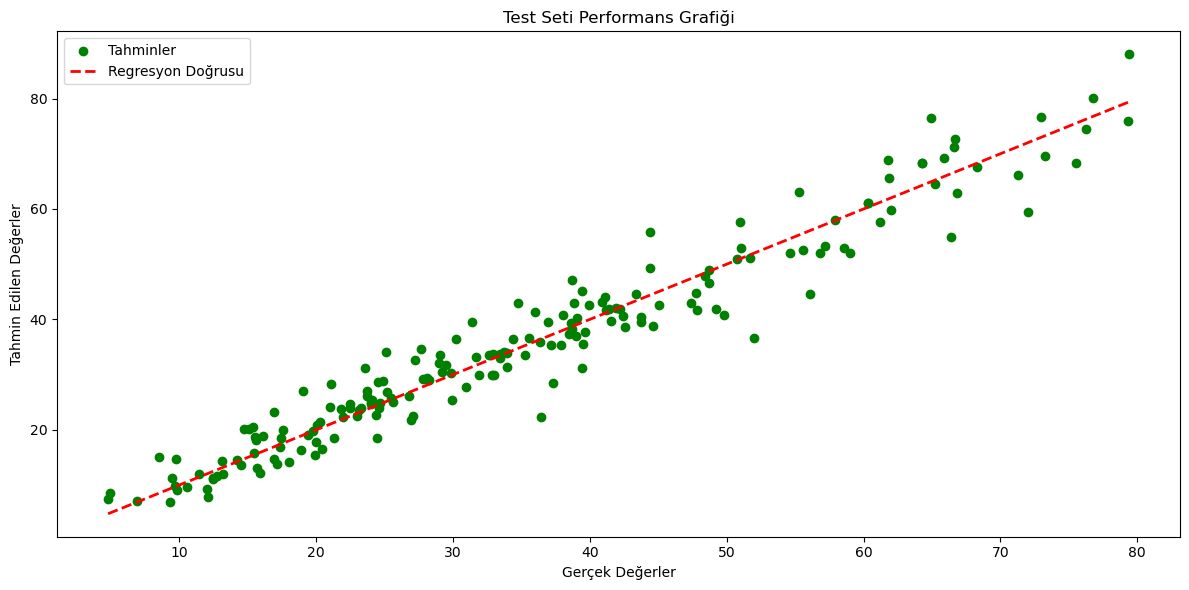

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, color='green', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Test Seti Performans Grafiği')
plt.legend()
plt.tight_layout()
plt.show()

Bu kod, modelin genel performansını daha sağlam bir şekilde değerlendirmek için **çapraz doğrulama (cross-validation)** yöntemini kullanır. Çapraz doğrulama, modelin farklı veri alt kümeleri üzerinde test edilerek daha güvenilir bir skor elde edilmesini sağlar.

---

#### **Kodun Adım Adım Açıklaması**:

1. **Çapraz Doğrulama (Cross-Validation) Skorlarının Hesaplanması**:
    ```python
    pr_cross_val_score = cross_val_score(best_model, X_train, y_train, cv=10, scoring="r2")
    ```
    - **`cross_val_score`** fonksiyonu, verilen modelin performansını **çapraz doğrulama** kullanarak değerlendirir.
    - **`best_model`**: Daha önce eğitilen ve en iyi `random_state` ile bulunan model, burada kullanılan modeldir.
    - **`X_train`** ve **`y_train`**: Eğitim verisi seti (özellikler ve hedef değişken).
    - **`cv=10`**: 10 katmanlı çapraz doğrulama kullanılır. Bu, verinin 10 parçaya bölünüp, her seferinde 1 parça test verisi olarak, geri kalan 9 parça ise eğitim verisi olarak kullanılarak modelin doğruluğu hesaplanır.
    - **`scoring="r2"`**: R² skoru kullanılarak modelin performansı değerlendirilir. Bu skor, modelin test verisi üzerindeki doğruluğunu ölçen bir metriktir.

2. **Çapraz Doğrulama Sonuçlarının Yazdırılması**:
    ```python
    print("Çapraz Doğrulama Skorları:", pr_cross_val_score)
    ```
    - Bu satır, 10 katmanlı çapraz doğrulama sonucu elde edilen R² skorlarını yazdırır. Her katman için bir skor elde edilir.

3. **Ortalama R² Skorunun Hesaplanması ve Yazdırılması**:
    ```python
    print(f"Ortalama R2 Skoru: {pr_cross_val_score.mean():.2f}")
    ```
    - **`pr_cross_val_score.mean()`**: Çapraz doğrulama sonuçlarının ortalamasını hesaplar. Bu, modelin genel başarısının daha güvenilir bir şekilde değerlendirilmesini sağlar.
    - **`{pr_cross_val_score.mean():.2f}`**: Ortalama R² skoru iki ondalıklı basamağa yuvarlanarak yazdırılır.

---

### **Özet**:
Bu kod, modelin performansını daha sağlam bir şekilde ölçmek için çapraz doğrulama (cross-validation) yöntemini kullanır. Model, 10 farklı alt küme üzerinde test edilir ve her bir testin sonucu olan R² skorları yazdırılır. Son olarak, bu skorların ortalaması alınarak modelin genel başarısı daha güvenilir bir şekilde değerlendirilir. Çapraz doğrulama, modelin overfitting (aşırı öğrenme) yapıp yapmadığını anlamaya yardımcı olur.

In [20]:
pr_cross_val_score = cross_val_score(best_model, X_train, y_train, cv=10, scoring="r2")
print("Çapraz Doğrulama Skorları:", pr_cross_val_score)
print(f"Ortalama R2 Skoru: {pr_cross_val_score.mean():.2f}")

Çapraz Doğrulama Skorları: [0.87538381 0.86954223 0.88923245 0.61046119 0.90587511 0.86386304
 0.89124088 0.9069442  0.74689302 0.87131373]
Ortalama R2 Skoru: 0.84


Bu hücre, **lineer regresyon** modelini oluşturup eğitir ve ardından **F-İstatistiği** ile **p-değeri** gibi önemli istatistiksel ölçümleri kullanarak modelin anlamlılığını değerlendirir.

---

#### **Kodun Adım Adım Açıklaması**:

1. **Sabitin Eklenmesi**:
    ```python
    E_sabiti = sm.add_constant(X_train)
    ```
    - **`sm.add_constant(X_train)`**: `statsmodels` kütüphanesinin **`add_constant()`** fonksiyonu, **sabiti (intercept)** ekler. Bu, regresyon analizlerinde modelin doğrusal formunun sabit terimini içerir.
    - Sabit terim, bağımsız değişkenlerin (özelliklerin) etkisi dışında, modelin başlangıç değeri olan bir terimdir ve genellikle **1** olarak kabul edilir.

2. **OLS (Ordinary Least Squares) Regresyon Modelinin Fit Edilmesi**:
    ```python
    EKKY = sm.OLS(y_train, E_sabiti).fit()
    ```
    - **`sm.OLS(y_train, E_sabiti)`**: **OLS** (En Küçük Kareler) regresyon modelini oluşturur. Bu model, bağımsız değişkenlerle bağımlı değişken arasındaki ilişkiyi en iyi şekilde açıklamak için doğrusal bir model kurar.
    - **`y_train`**: Bağımlı değişken (hedef değişken), yani tahmin etmeye çalıştığımız veri.
    - **`.fit()`**: Modelin eğitilmesini sağlar. Eğitim verisi (`X_train`) ile hedef değişken (`y_train`) arasındaki doğrusal ilişkiyi öğrenir.

3. **F-İstatistiği ve p-Değerinin Hesaplanması**:
    ```python
    f_statistic = EKKY.fvalue
    p_value = EKKY.f_pvalue
    ```
    - **`EKKY.fvalue`**: Modelin **F-İstatistiği** hesaplanır. Bu istatistik, modelin genel anlamlılığını test eder ve modelin bağımsız değişkenleriyle hedef değişken arasında anlamlı bir ilişki olup olmadığını gösterir. Yüksek F-İstatistiği, modelin başarılı olduğunu işaret eder.
    - **`EKKY.f_pvalue`**: F-İstatistiğinin p-değeri hesaplanır. Bu değer, F-İstatistiği ile birlikte modelin anlamlı olup olmadığını test etmek için kullanılır. Küçük bir p-değeri (genellikle 0.05'ten küçük) modelin anlamlı olduğunu gösterir.

4. **F-İstatistiği ve p-Değerinin Yazdırılması**:
    ```python
    print(f'F-İstatistiği: {f_statistic:.2f}')
    print(f'p-Değeri: {p_value:.10f}')
    ```
    - Bu satırlar, hesaplanan **F-İstatistiği** ve **p-değerini** ekrana yazdırır. **`{:.2f}`** ve **`{:.10f}`** formatlama ifadeleri, çıktının iki ondalıklı ve on tam sayı basamağında olmasını sağlar.

5. **Model Özeti**:
    ```python
    print(EKKY.summary())
    ```
    - **`EKKY.summary()`**: Modelin detaylı istatistiksel özetini yazdırır. Bu özet, modelin başarı durumunu gösteren pek çok istatistiği içerir. Örneğin:
      - **R² (R-Kare) Skoru**: Modelin veri kümesindeki varyansın ne kadarını açıkladığını gösterir.
      - **p-değerleri**: Her bir bağımsız değişkenin anlamlılığını test eder.
      - **Coefficients (Katsayılar)**: Bağımsız değişkenlerin model üzerindeki etkilerini gösterir.

---

### **Özet**:
Bu kod, **OLS regresyon** modelini kullanarak eğitim verisinden bir model oluşturur ve ardından bu modelin anlamlılığını değerlendirir. Modelin genel anlamlılığını test etmek için **F-İstatistiği** ve **p-değeri** hesaplanır. F-İstatistiği yüksek ve p-değeri düşük ise modelin istatistiksel olarak anlamlı olduğu kabul edilir. Son olarak, modelin performansı ve katsayıları gibi bilgileri içeren **özet** çıktısı gösterilir. Bu, modelin genel başarı durumunu ve her bir bağımsız değişkenin etkisini anlamanızı sağlar.

In [21]:
E_sabiti = sm.add_constant(X_train) 
EKKY = sm.OLS(y_train, E_sabiti).fit() 
f_statistic = EKKY.fvalue 
p_value = EKKY.f_pvalue 
print(f'F-İstatistiği: {f_statistic:.2f}') 
print(f'p-Değeri: {p_value:.10f}')
print(EKKY.summary())

F-İstatistiği: 58.44
p-Değeri: 0.0000000000
                               OLS Regression Results                               
Dep. Variable:     compressive_strength_mpa   R-squared:                       0.943
Model:                                  OLS   Adj. R-squared:                  0.927
Method:                       Least Squares   F-statistic:                     58.44
Date:                      Sun, 12 Jan 2025   Prob (F-statistic):          2.55e-278
Time:                              15:36:32   Log-Likelihood:                -2058.0
No. Observations:                       740   AIC:                             4444.
Df Residuals:                           576   BIC:                             5199.
Df Model:                               163                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------